<a href="https://colab.research.google.com/github/shikha394/Hospital_Management_System/blob/master/sentiment_analysis_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from gensim.parsing.preprocessing import remove_stopwords

In [ ]:
df=pd.read_csv("/content/train.csv (3).zip",encoding= 'unicode_escape')

In [ ]:
df

textID                                               text  \
0      cb774db0d1                I`d have responded, if I were going   
1      549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2      088c60f138                          my boss is bullying me...   
3      9642c003ef                     what interview! leave me alone   
4      358bd9e861   Sons of ****, why couldn`t they put them on t...   
...           ...                                                ...   
27476  4eac33d1c0   wish we could come see u on Denver  husband l...   
27477  4f4c4fc327   I`ve wondered about rake to.  The client has ...   
27478  f67aae2310   Yay good for both of you. Enjoy the break - y...   
27479  ed167662a5                         But it was worth it  ****.   
27480  6f7127d9d7     All this flirting going on - The ATG smiles...   

                                           selected_text sentiment  \
0                    I`d have responded, if I were going   neutral   
1                                               Sooo SAD  negative   
2                                            bullying me  negative   
3                                         leave me alone  negative   
4                                          Sons of ****,  negative   
...                                                  ...       ...   
27476                                             d lost  negative   
27477                                      , don`t force  negative   
27478                          Yay good for both of you.  positive   
27479                         But it was worth it  ****.  positive   
27480  All this flirting going on - The ATG smiles. Y...   neutral   

      Time of Tweet Age of User      Country  Population -2020  \
0           morning        0-20  Afghanistan          38928346   
1              noon       21-30      Albania           2877797   
2             night       31-45      Algeria          43851044   
3           morning       46-60      Andorra             77265   
4              noon       60-70       Angola          32866272   
...             ...         ...          ...               ...   
27476         night       31-45        Ghana          31072940   
27477       morning       46-60       Greece          10423054   
27478          noon       60-70      Grenada            112523   
27479         night      70-100    Guatemala          17915568   
27480       morning        0-20       Guinea          13132795   

       Land Area (Km²)  Density (P/Km²)  
0             652860.0               60  
1              27400.0              105  
2            2381740.0               18  
3                470.0              164  
4            1246700.0               26  
...                ...              ...  
27476         227540.0              137  
27477         128900.0               81  
27478            340.0              331  
27479         107160.0              167  
27480         246000.0               53  

[27481 rows x 10 columns]

In [ ]:
df.isnull().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [ ]:
df=df[['text','sentiment']]
df

text sentiment
0                    I`d have responded, if I were going   neutral
1          Sooo SAD I will miss you here in San Diego!!!  negative
2                              my boss is bullying me...  negative
3                         what interview! leave me alone  negative
4       Sons of ****, why couldn`t they put them on t...  negative
...                                                  ...       ...
27476   wish we could come see u on Denver  husband l...  negative
27477   I`ve wondered about rake to.  The client has ...  negative
27478   Yay good for both of you. Enjoy the break - y...  positive
27479                         But it was worth it  ****.  positive
27480     All this flirting going on - The ATG smiles...   neutral

[27481 rows x 2 columns]

In [ ]:
df.isnull().sum()

text         1
sentiment    0
dtype: int64

In [ ]:
df['text'] = df['text'].fillna(' ')

<ipython-input-203-1f089e5a100a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].fillna(' ')


In [ ]:
df.isnull().sum()

text         0
sentiment    0
dtype: int64

In [ ]:
df.shape

(27481, 2)

In [ ]:
df['sentiment'].value_counts().index

Index(['neutral', 'positive', 'negative'], dtype='object')

Exploratory Data Analysis (EDA)

<Axes: xlabel='sentiment', ylabel='Count'>

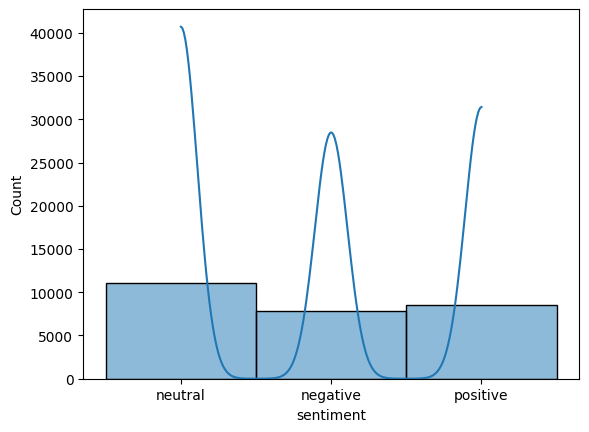

In [ ]:
sns.histplot(df['sentiment'],kde=True)

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Percentage of sentiment', fontsize=20)
df.sentiment.value_counts().plot(kind='pie', labels=['neutral', 'positive','negative'], autopct='%2.f')

<Axes: title={'center': 'Percentage of sentiment'}, ylabel='sentiment'>

In [ ]:
x= df['sentiment'].value_counts()
y= x.sort_index()
plt.figure(figsize=(5,5))
sns.barplot(x=x.index,y=x.values, alpha=0.8)
plt.title("sentiment Distribution")
plt.ylabel('Frequency')
plt.xlabel('sentiment')

Text(0.5, 0, 'sentiment')

In [ ]:
df['text']=df['text'].map(str)

<ipython-input-210-2709a752f0bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text']=df['text'].map(str)


In [ ]:
df['sentiment'].replace(['negative','neutral','positive'],[-1,0,1],inplace = True)

<ipython-input-211-11e76e9f20f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'].replace(['negative','neutral','positive'],[-1,0,1],inplace = True)


In [ ]:
df

text  sentiment
0                    I`d have responded, if I were going          0
1          Sooo SAD I will miss you here in San Diego!!!         -1
2                              my boss is bullying me...         -1
3                         what interview! leave me alone         -1
4       Sons of ****, why couldn`t they put them on t...         -1
...                                                  ...        ...
27476   wish we could come see u on Denver  husband l...         -1
27477   I`ve wondered about rake to.  The client has ...         -1
27478   Yay good for both of you. Enjoy the break - y...          1
27479                         But it was worth it  ****.          1
27480     All this flirting going on - The ATG smiles...          0

[27481 rows x 2 columns]

In [ ]:
import string
punctuations=string.punctuation
def clean_punctuations(tweet):
    translator = str.maketrans('','',punctuations)
    return tweet.translate(translator)
df['text'] = df['text'].apply(lambda i: clean_punctuations(i))
df

<ipython-input-213-aaec3eef3801>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda i: clean_punctuations(i))


text  sentiment
0                      Id have responded if I were going          0
1             Sooo SAD I will miss you here in San Diego         -1
2                                 my boss is bullying me         -1
3                          what interview leave me alone         -1
4       Sons of  why couldnt they put them on the rel...         -1
...                                                  ...        ...
27476   wish we could come see u on Denver  husband l...         -1
27477   Ive wondered about rake to  The client has ma...         -1
27478   Yay good for both of you Enjoy the break  you...          1
27479                              But it was worth it            1
27480     All this flirting going on  The ATG smiles ...          0

[27481 rows x 2 columns]

STOP_WORDS_REMOVAL

In [ ]:
def remove_stop_word(text):
  words = remove_stopwords(text)
  return words
df['text'] = df['text'].apply(lambda i: remove_stop_word(i))

<ipython-input-214-34aa33b7730e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda i: remove_stop_word(i))


In [ ]:
df

text  sentiment
0                                   Id responded I going          0
1                              Sooo SAD I miss San Diego         -1
2                                          boss bullying         -1
3                                        interview leave         -1
4                                   Sons releases bought         -1
...                                                  ...        ...
27476         wish come u Denver husband lost job afford         -1
27477  Ive wondered rake The client clear NET dont fo...         -1
27478  Yay good Enjoy break probably need hectic week...          1
27479                                          But worth          1
27480         All flirting going The ATG smiles Yay hugs          0

[27481 rows x 2 columns]

 Tokenization

In [ ]:
from gensim.utils import simple_preprocess
df['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in df['text']]
df

<ipython-input-216-f8a1c08e5e26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in df['text']]


text  sentiment  \
0                                   Id responded I going          0   
1                              Sooo SAD I miss San Diego         -1   
2                                          boss bullying         -1   
3                                        interview leave         -1   
4                                   Sons releases bought         -1   
...                                                  ...        ...   
27476         wish come u Denver husband lost job afford         -1   
27477  Ive wondered rake The client clear NET dont fo...         -1   
27478  Yay good Enjoy break probably need hectic week...          1   
27479                                          But worth          1   
27480         All flirting going The ATG smiles Yay hugs          0   

                                          tokenized_text  
0                                 [id, responded, going]  
1                          [sooo, sad, miss, san, diego]  
2                                       [boss, bullying]  
3                                     [interview, leave]  
4                               [sons, releases, bought]  
...                                                  ...  
27476   [wish, come, denver, husband, lost, job, afford]  
27477  [ive, wondered, rake, the, client, clear, net,...  
27478  [yay, good, enjoy, break, probably, need, hect...  
27479                                       [but, worth]  
27480  [all, flirting, going, the, atg, smiles, yay, ...  

[27481 rows x 3 columns]

APPLYING STEMMING

In [ ]:
from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()
df['stemmed_tokens'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in df['tokenized_text'] ]
df

<ipython-input-217-b0120dd83ad4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stemmed_tokens'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in df['tokenized_text'] ]


text  sentiment  \
0                                   Id responded I going          0   
1                              Sooo SAD I miss San Diego         -1   
2                                          boss bullying         -1   
3                                        interview leave         -1   
4                                   Sons releases bought         -1   
...                                                  ...        ...   
27476         wish come u Denver husband lost job afford         -1   
27477  Ive wondered rake The client clear NET dont fo...         -1   
27478  Yay good Enjoy break probably need hectic week...          1   
27479                                          But worth          1   
27480         All flirting going The ATG smiles Yay hugs          0   

                                          tokenized_text  \
0                                 [id, responded, going]   
1                          [sooo, sad, miss, san, diego]   
2                                       [boss, bullying]   
3                                     [interview, leave]   
4                               [sons, releases, bought]   
...                                                  ...   
27476   [wish, come, denver, husband, lost, job, afford]   
27477  [ive, wondered, rake, the, client, clear, net,...   
27478  [yay, good, enjoy, break, probably, need, hect...   
27479                                       [but, worth]   
27480  [all, flirting, going, the, atg, smiles, yay, ...   

                                          stemmed_tokens  
0                                      [id, respond, go]  
1                          [sooo, sad, miss, san, diego]  
2                                          [boss, bulli]  
3                                      [interview, leav]  
4                                  [son, releas, bought]  
...                                                  ...  
27476   [wish, come, denver, husband, lost, job, afford]  
27477  [iv, wonder, rake, the, client, clear, net, do...  
27478  [yai, good, enjoi, break, probabl, need, hecti...  
27479                                       [but, worth]  
27480        [all, flirt, go, the, atg, smile, yai, hug]  

[27481 rows x 4 columns]

In [ ]:
# import re
# corpus = []
# for i in range(0, 27481):
#     review = re.sub(r'\W', ' ', str(df["text"][i]))
#     review = review.lower()
#     review = re.sub(r'^br$', ' ', review)
#     review = re.sub(r'\s+br\s+',' ',review)
#     review = re.sub(r'\s+[a-z]\s+', ' ',review)
#     review = re.sub(r'^b\s+', '', review)
#     review = re.sub(r'\s+', ' ', review)
#     corpus.append(review)

In [ ]:
# # Creating the BOW model
# from nltk.corpus import stopwords
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(max_features = 27481 , min_df = 3, max_df = 0.6, stop_words = stopwords.words('english'))
# count_vect = vectorizer.fit_transform(corpus).toarray()

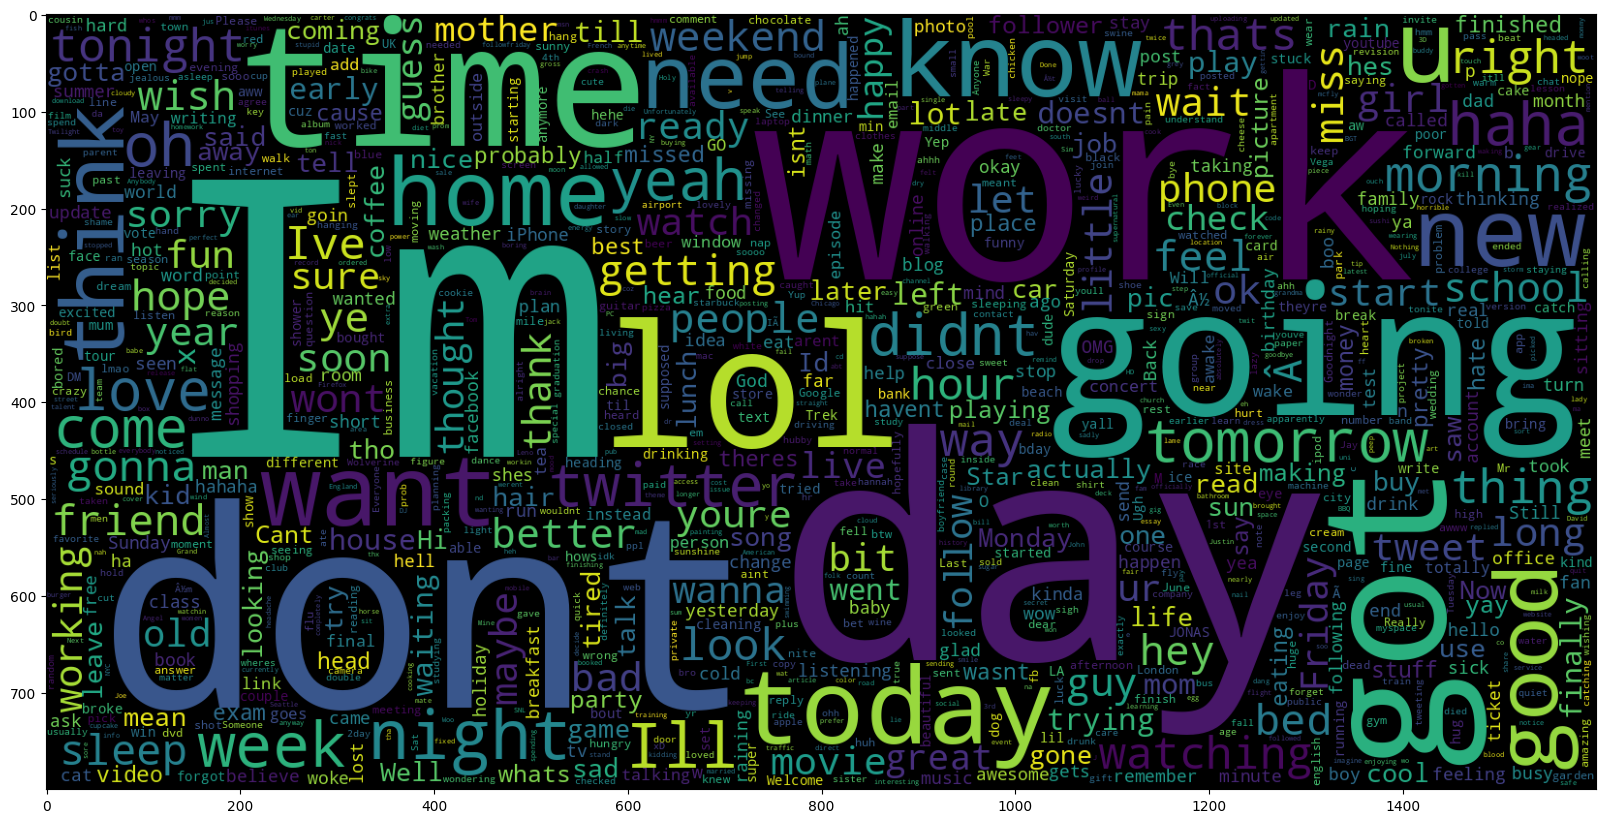

In [ ]:
#PLOTING WORD_CLOUD FOR NEUTRAL WORD
from wordcloud import WordCloud
import matplotlib.pyplot as plt
pos=' '.join([i for i in df['text'][df['sentiment']==0]])
plt.figure(figsize = (20,20))
wc=WordCloud(max_words = 1000 , width = 1600 , height = 800,collocations=False).generate(pos)
plt.imshow(wc)

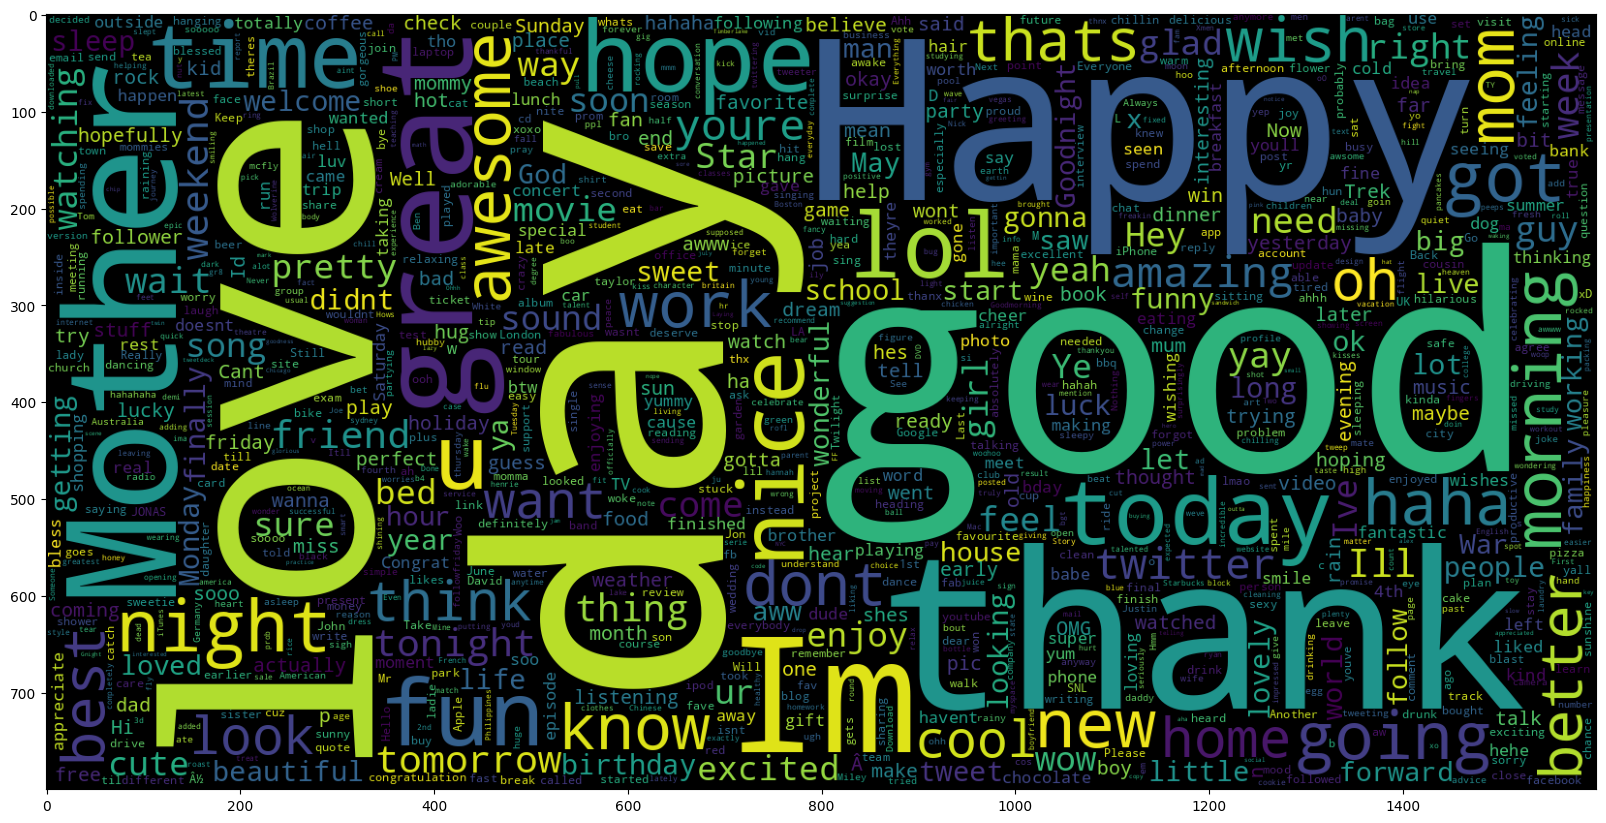

In [ ]:
#PLOTING WORD_CLOUD FOR POSITIVE WORD
from wordcloud import WordCloud
import matplotlib.pyplot as plt
pos=' '.join([i for i in df['text'][df['sentiment']==1]])
plt.figure(figsize = (20,20))
wc=WordCloud(max_words = 1000 , width = 1600 , height = 800,collocations=False).generate(pos)
plt.imshow(wc)

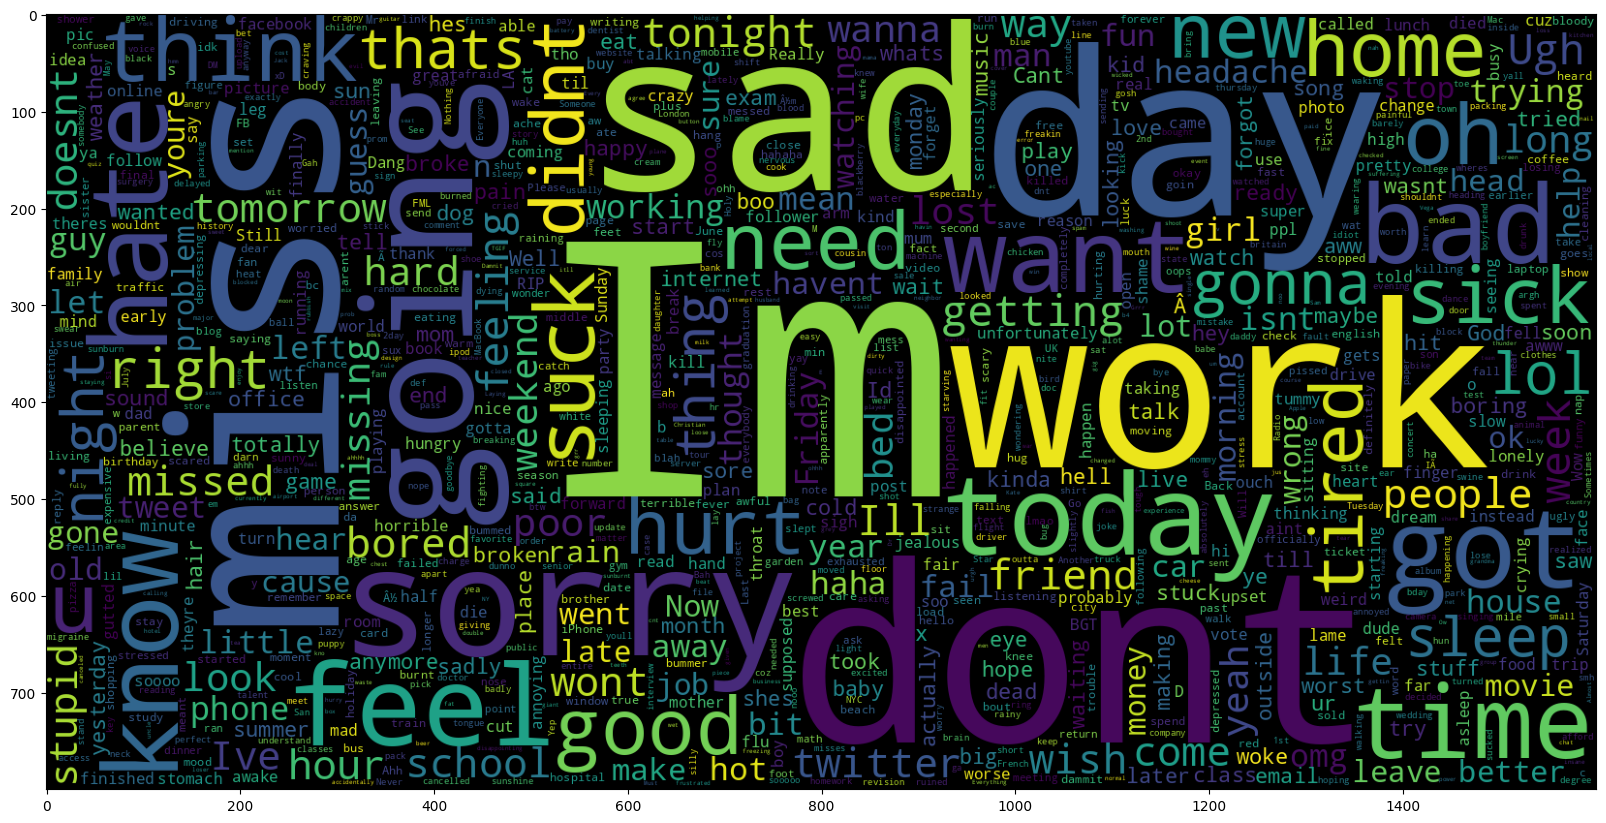

In [ ]:
#PLOTING WORD_CLOUD FOR negative WORD
from wordcloud import WordCloud
import matplotlib.pyplot as plt
pos=' '.join([i for i in df['text'][df['sentiment']==-1]])
plt.figure(figsize = (20,20))
wc=WordCloud(max_words = 1000 , width = 1600 , height = 800,collocations=False).generate(pos)
plt.imshow(wc)

In [ ]:
df['stemmed_tokens'] = [','.join(map(str, i)) for i in df['stemmed_tokens']]
df

<ipython-input-222-8bb0c51240b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stemmed_tokens'] = [','.join(map(str, i)) for i in df['stemmed_tokens']]


text  sentiment  \
0                                   Id responded I going          0   
1                              Sooo SAD I miss San Diego         -1   
2                                          boss bullying         -1   
3                                        interview leave         -1   
4                                   Sons releases bought         -1   
...                                                  ...        ...   
27476         wish come u Denver husband lost job afford         -1   
27477  Ive wondered rake The client clear NET dont fo...         -1   
27478  Yay good Enjoy break probably need hectic week...          1   
27479                                          But worth          1   
27480         All flirting going The ATG smiles Yay hugs          0   

                                          tokenized_text  \
0                                 [id, responded, going]   
1                          [sooo, sad, miss, san, diego]   
2                                       [boss, bullying]   
3                                     [interview, leave]   
4                               [sons, releases, bought]   
...                                                  ...   
27476   [wish, come, denver, husband, lost, job, afford]   
27477  [ive, wondered, rake, the, client, clear, net,...   
27478  [yay, good, enjoy, break, probably, need, hect...   
27479                                       [but, worth]   
27480  [all, flirting, going, the, atg, smiles, yay, ...   

                                          stemmed_tokens  
0                                          id,respond,go  
1                                sooo,sad,miss,san,diego  
2                                             boss,bulli  
3                                         interview,leav  
4                                      son,releas,bought  
...                                                  ...  
27476           wish,come,denver,husband,lost,job,afford  
27477  iv,wonder,rake,the,client,clear,net,dont,forc,...  
27478  yai,good,enjoi,break,probabl,need,hectic,weeke...  
27479                                          but,worth  
27480                 all,flirt,go,the,atg,smile,yai,hug  

[27481 rows x 4 columns]

In [ ]:
import re
def remove_comma(text):
  return re.sub(',',' ',text)
df['stemmed_tokens'] = df['stemmed_tokens'].apply(lambda i: remove_comma(i))

<ipython-input-223-8a0d8e004562>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stemmed_tokens'] = df['stemmed_tokens'].apply(lambda i: remove_comma(i))


In [ ]:
df

text  sentiment  \
0                                   Id responded I going          0   
1                              Sooo SAD I miss San Diego         -1   
2                                          boss bullying         -1   
3                                        interview leave         -1   
4                                   Sons releases bought         -1   
...                                                  ...        ...   
27476         wish come u Denver husband lost job afford         -1   
27477  Ive wondered rake The client clear NET dont fo...         -1   
27478  Yay good Enjoy break probably need hectic week...          1   
27479                                          But worth          1   
27480         All flirting going The ATG smiles Yay hugs          0   

                                          tokenized_text  \
0                                 [id, responded, going]   
1                          [sooo, sad, miss, san, diego]   
2                                       [boss, bullying]   
3                                     [interview, leave]   
4                               [sons, releases, bought]   
...                                                  ...   
27476   [wish, come, denver, husband, lost, job, afford]   
27477  [ive, wondered, rake, the, client, clear, net,...   
27478  [yay, good, enjoy, break, probably, need, hect...   
27479                                       [but, worth]   
27480  [all, flirting, going, the, atg, smiles, yay, ...   

                                          stemmed_tokens  
0                                          id respond go  
1                                sooo sad miss san diego  
2                                             boss bulli  
3                                         interview leav  
4                                      son releas bought  
...                                                  ...  
27476           wish come denver husband lost job afford  
27477  iv wonder rake the client clear net dont forc ...  
27478  yai good enjoi break probabl need hectic weeke...  
27479                                          but worth  
27480                 all flirt go the atg smile yai hug  

[27481 rows x 4 columns]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['stemmed_tokens'], df['sentiment'], test_size = 0.3, random_state = 0)
print("Value counts for Train sentiments")
print(y_train.value_counts())
print("Value counts for Test sentiments")
print(y_test.value_counts())

Value counts for Train sentiments
 0    7778
 1    6025
-1    5433
Name: sentiment, dtype: int64
Value counts for Test sentiments
 0    3340
 1    2557
-1    2348
Name: sentiment, dtype: int64


In [ ]:
print(x_train)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

17530    dai aight clean went mcd check hader toyno luc...
20908                parrrttyplai twister get tipsywel lol
22374    but realiti surviv what doesnt kill make stron...
5048                              ok pic that unlucki lmao
5500                                  make mother dai gift
                               ...                        
13123                                                 love
19648                                oh dont spoil fun lol
9845                                         come it gonna
10799                     for record john mayer freak cool
2732     and aint happi lucki todai the world dont feel...
Name: stemmed_tokens, Length: 19236, dtype: object
(19236,)
(8245,)
(8245,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec

In [ ]:
# y=df['sentiment']

In [ ]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
cv = CountVectorizer()
cv.fit(x_train)
x_train=cv.transform(x_train)
x_test = cv.transform(x_test)

In [ ]:
#APPLYING LogisticRegression MODEL
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score
model_1=LogisticRegression()
model_1.fit(x_train,y_train)
pred_1=model_1.predict(x_test)
a1=accuracy_score(y_test,pred_1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
a1

0.6851425106124924

In [ ]:
#APPLYING SVM MODEL
from sklearn.svm import LinearSVC
model_2=LinearSVC()
model_2.fit(x_train,y_train)
pred_2=model_2.predict(x_test)
a2=accuracy_score(y_test,pred_2)

In [ ]:
a2

0.6568829593693147

In [ ]:
#APPLYING NAIVE_BYAS
from sklearn.naive_bayes import BernoulliNB
model_3=BernoulliNB()
model_3.fit(x_train, y_train)
pred_3= model_3.predict(x_test)
a3=accuracy_score(y_test,pred_3)

In [ ]:
a3

0.6288659793814433

In [ ]:
from sklearn import decomposition, ensemble
from sklearn.metrics import confusion_matrix,classification_report
model_4=ensemble.RandomForestClassifier()
model_4.fit(x_train,y_train)
pred_4 = model_4.predict(x_test)
a4=accuracy_score(y_test,pred_4)
print(a4)
y_pred = model_4.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.6842935112189206
[[1424  750  174]
 [ 455 2350  535]
 [ 133  556 1868]]
              precision    recall  f1-score   support

          -1       0.71      0.61      0.65      2348
           0       0.64      0.70      0.67      3340
           1       0.72      0.73      0.73      2557

    accuracy                           0.68      8245
   macro avg       0.69      0.68      0.68      8245
weighted avg       0.69      0.68      0.68      8245

